In [794]:
%load_ext autoreload
%autoreload 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink
import os
from IPython.display import clear_output, display

%aimport plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [795]:

selected_folder = 'Fishyscapes_LaF'
selected_file = '01_Hanns_Klemm_Str_45_000002_000190.png'
selected_algo = 'grood_knn_e2e_cityscapes_500k_fl003_condensv5_randomcrop1344_hflip_nptest_lr0025wd54_ipdf0_ioodpdf0uni1_staticood1'
threshold = [0.8, 0.997]

output = widgets.Output()


#13_Elly 00 110


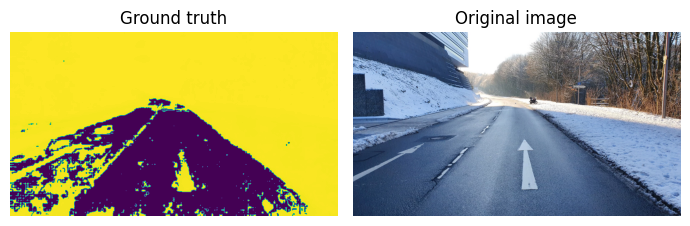

In [796]:
#Image preview


fig, ax = plt.subplots(1, 2, figsize=(7, 3))  # 1 row, 2 columns, and adjust the figure size as needed
#mask_gray = cv.cvtColor(original_gt, cv.COLOR_BGR2GRAY)


# Display the mask
ax[0].imshow(original_gt)
ax[0].set_title('Ground truth')
ax[0].axis('off')  

# Display the image
ax[1].imshow(original_image)
ax[1].set_title('Original image')
ax[1].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [797]:
def process_default(img, gt, use_dataset = True):
    print(use_dataset)
    contoured_image = plot.drawContours(img, gt, use_dataset, threshold)
    overlay_50 = plot.drawOverlay(0.5, img, gt, use_dataset, threshold)
    overlay_100 = plot.drawOverlay(1, img, gt, use_dataset, threshold)
    return np.concatenate((contoured_image, overlay_50, overlay_100), axis=1)

In [798]:
def process_pred(img, gt):
    
    four_imgs_in_one = process_default(img, gt, False) # + ctvrty obrazek
    
    return four_imgs_in_one

In [799]:
def show_final(new_gt, id, fig_size=(16, 12)):
    
    # změna slideru = ulozeny #2 (ctyrty obrazek) a default zustanou stejne, nacteni #1 jen metod na kresleni       show_final(False, 0)
    # změna metody = ulozeny #1 a default zustane stejny, nacteni gt noveho + metody kresleni                       show_final(True, 1)
    # změna filu = nacteni novych obrazku + gt + metod kresleni u všech obrázků (id 3)                              show_final(True/False, 2)
    
    #Basic images and GTs
    default_image = None
    default_gt = None
    pred_gt = None
    pred_gt2 = None
    
    image_list = [pred_gt, pred_gt2, default_image, default_gt]

    # Combined images
    alg1 = None
    alg2 = None
    default = None

    combined_image_list = [alg1, alg2, default]    

    # New files for everything
    if(id > 1):
        default_image = plot.load_image(selected_file, selected_folder)
        default_gt = plot.load_gt(selected_file, selected_folder, selected_algo, True)
        pred_gt = plot.load_gt(selected_file, selected_folder, selected_algo, False)
        #pred_gt2 = plot.load_gt(selected_file, selected_folder, selected_algo, False)

        default = process_default(default_image, default_gt)
        alg1 = process_pred(default_image, pred_gt)
        #alg2 = process_pred(default_image, pred_gt2)
    
    # New process / gt + process for selected image 
    else:
        # Process image with new gt with ID
        if(new_gt):
            image_list[id] = plot.load_gt(selected_file, selected_folder, selected_algo, True)
            combined_image_list[id] = process_pred(default_image,  image_list[id])
        # Process with old gt with ID
        else:
            combined_image_list[id] = process_pred(default_image, image_list[id])    
    
    
    final_image = np.concatenate((default, alg1, ), axis=0) #alg2
    
    with output:
        clear_output(wait=True)
        plt.figure(figsize=fig_size)
        plt.imshow(final_image)
        plt.axis('off')
        plt.title('Contours and Overlays')
        plt.show()

In [800]:
def load_and_process(new_img, new_gt, use_dataset):
    #print(new_img, new_gt, use_dataset)
    
    global original_image
    global original_gt
    
    if(new_img):    
        original_image = plot.load_image(selected_file, selected_folder)
        

    if(new_gt):
        original_gt = plot.load_gt(selected_file, selected_folder, selected_algo, use_dataset)
    
    return process_images(use_dataset)

In [801]:
def process_images(use_dataset):
        contoured_image = plot.drawContours(original_image, original_gt, use_dataset, threshold)
        overlay_50 = plot.drawOverlay(0.5, original_image, original_gt, use_dataset, threshold)
        overlay_100 = plot.drawOverlay(1, original_image, original_gt, use_dataset, threshold)
        return np.concatenate((contoured_image, overlay_50, overlay_100), axis=1)

In [802]:


def show_image(new_img, new_gt, fig_size=(16, 12)):
    

    first_row = load_and_process(new_img, new_gt, True)
    second_row = load_and_process(new_img, new_gt, False) 


    
    combined_image = np.concatenate((first_row, second_row), axis=0) #
    
    with output:
        clear_output(wait=True)
        plt.figure(figsize=fig_size)
        plt.imshow(combined_image)
        plt.axis('off')
        plt.title('Contours and Overlays')
        plt.show()

In [803]:
def on_folder_selected(change):
    global selected_folder
    selected_folder = change['new']
    #print(f"Selected folder: {change['new']}")
    # Update the image selector options based on the selected folder
    image_selector_widget.options = plot.get_all_files(f'data/export/datasets/{selected_folder}/test/imgs/')

In [804]:
def on_model_selected(change):
    global selected_algo
    selected_algo = change['new']
    #print(f"Selected model: {change['new']}")
    
    show_image(False, True)

In [805]:
def on_file_selected(change):
    global selected_file

    selected_file = change['new']
    #print(f"Selected file: {selected_file}")
    
    #show_image(True, True)
    show_final(True, 3)

In [806]:
def update_slider(change):
    threshold[0], threshold[1] = road_slider.value, obstacle_slider.value
    #show_image(False, True)
    #show_final(True, 1)

01_Hanns_Klemm_Str_45_00005_000230  
No ground truth

In [807]:
road_slider = widgets.FloatSlider(value=threshold[0], min=0.4, max=0.9995, step=0.0001, description='Road Threshold', readout_format='.4f',
                                  style={'description_width': 'initial'}, layout=widgets.Layout(width='500px'))
road_slider.observe(update_slider, names='value')

obstacle_slider = widgets.FloatSlider(value=threshold[1], min=0.95, max=1, step=0.0001, description='Obstacle Threshold', readout_format='.4f', 
                                      style={'description_width': 'initial'}, layout=widgets.Layout(width='500px'))
obstacle_slider.observe(update_slider, names='value')

folder_selector_widget = widgets.Dropdown(
    options=plot.get_all_folders('data/export/datasets/'),  # Call the folder-only function
    description='Choose folder',
    disabled=False,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='500px')
)
folder_selector_widget.observe(on_folder_selected, names='value')

image_selector_widget = widgets.Dropdown(
    options=plot.get_all_files('data/export/datasets/' + selected_folder + '/test/imgs/'),
    description='Choose file',
    disabled=False,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='500px')
)
image_selector_widget.observe(on_file_selected, names='value')

model_selector_widget = widgets.Dropdown(
    options=plot.get_all_folders('data/export/results/'),
    description='Choose model',
    disabled=False,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='500px')
)
model_selector_widget.observe(on_model_selected, names='value')

 

display(folder_selector_widget, image_selector_widget, model_selector_widget, road_slider, obstacle_slider, output)
#show_image(True, True)
show_final(True, 3)


Dropdown(description='Choose folder', layout=Layout(width='500px'), options=('RoadObstacles21', 'RoadAnomaly',…

Dropdown(description='Choose file', layout=Layout(width='500px'), options=('01_Hanns_Klemm_Str_45_000005_00023…

Dropdown(description='Choose model', layout=Layout(width='500px'), options=('grood_logml_1000K_01adamw_tau10_r…

FloatSlider(value=0.8, description='Road Threshold', layout=Layout(width='500px'), max=0.9995, min=0.4, readou…

FloatSlider(value=0.997, description='Obstacle Threshold', layout=Layout(width='500px'), max=1.0, min=0.95, re…

Output()

True
False
